In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import venn
from itertools import combinations

In [2]:
corr = pd.read_csv('../open/train.csv')[['Y_Quality','Y_Class']]

[]

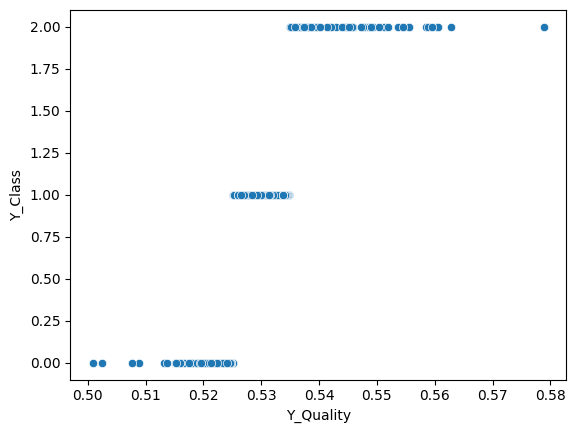

In [3]:
sns.scatterplot(corr, x='Y_Quality', y='Y_Class')
plt.plot()

In [4]:
df = pd.read_csv('../open/train.csv').drop(['Y_Quality','TIMESTAMP','Y_Quality'],axis=1).dropna(axis=1, how='all')
df = df.loc[:,~df.T.duplicated(keep='first')]

In [5]:
display(df.head())

,PRODUCT_ID,Y_Class,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_7,...,X_2799,X_2800,X_2801,X_2837,X_2839,X_2840,X_2841,X_2842,X_2843,X_2871
0,TRAIN_000,1,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,25.0,22.925926,20.0,9.04,5.02,7.00,40.06,0.000331,0.000033,NaN
1,TRAIN_001,2,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,26.0,25.050000,24.0,8.00,5.00,7.05,36.54,0.001150,0.000009,NaN
2,TRAIN_002,1,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,26.0,23.962963,22.0,9.04,5.02,6.52,40.05,0.000332,0.000033,NaN
3,TRAIN_003,2,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,26.0,25.037037,23.0,7.49,5.01,7.03,40.03,0.001210,0.000008,NaN
4,TRAIN_004,1,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,26.0,24.000000,22.0,9.04,5.03,6.52,40.07,0.000334,0.000041,NaN


In [6]:
for col in df.columns:
    if len(df[col].value_counts())==1:
        df = df.drop(col, axis=1)

In [7]:
df.describe()

,Y_Class,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,X_13,...,X_2798,X_2799,X_2800,X_2801,X_2837,X_2839,X_2840,X_2841,X_2842,X_2843
count,598.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.025084,2.409742,95.123209,10.392550,48.802292,10.048711,41.469914,497.050716,503.401433,488.307736,...,22.041667,26.475000,24.625420,22.375000,8.184583,4.959333,6.938917,40.069667,0.000716,0.000014
std,0.565069,5.895256,4.107640,0.489019,4.373824,0.215571,10.515032,17.264680,17.975169,17.335538,...,0.301142,0.916355,0.611483,0.698889,0.636178,0.176662,0.179429,1.257085,0.000878,0.000010
min,0.000000,1.000000,87.000000,10.000000,45.000000,10.000000,31.000000,433.900000,440.200000,424.300000,...,21.000000,24.000000,22.090909,20.000000,7.020000,4.490000,6.490000,35.600000,0.000120,0.000006
25%,1.000000,2.000000,93.000000,10.000000,45.000000,10.000000,31.000000,487.400000,493.400000,478.500000,...,22.000000,26.000000,24.364316,22.000000,7.555000,4.990000,7.000000,39.567500,0.000186,0.000009
50%,1.000000,2.000000,95.000000,10.000000,45.000000,10.000000,31.000000,499.900000,505.000000,489.800000,...,22.000000,27.000000,24.793103,22.000000,8.020000,5.010000,7.010000,40.090000,0.000331,0.000011
75%,1.000000,2.000000,98.000000,11.000000,51.000000,10.000000,52.000000,509.600000,516.300000,500.900000,...,22.000000,27.000000,25.041364,23.000000,8.530000,5.020000,7.020000,41.070000,0.001203,0.000012
max,2.000000,103.000000,102.000000,11.000000,62.000000,11.000000,52.000000,527.200000,538.000000,518.700000,...,23.000000,28.000000,26.041667,24.000000,10.520000,5.520000,7.050000,41.630000,0.004480,0.000043


In [8]:
df.head()

,PRODUCT_ID,Y_Class,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,...,X_2798,X_2799,X_2800,X_2801,X_2837,X_2839,X_2840,X_2841,X_2842,X_2843
0,TRAIN_000,1,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,25.0,22.925926,20.0,9.04,5.02,7.00,40.06,0.000331,0.000033
1,TRAIN_001,2,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,26.0,25.050000,24.0,8.00,5.00,7.05,36.54,0.001150,0.000009
2,TRAIN_002,1,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,26.0,23.962963,22.0,9.04,5.02,6.52,40.05,0.000332,0.000033
3,TRAIN_003,2,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,26.0,25.037037,23.0,7.49,5.01,7.03,40.03,0.001210,0.000008
4,TRAIN_004,1,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,26.0,24.000000,22.0,9.04,5.03,6.52,40.07,0.000334,0.000041


In [9]:
T05 = df[df['LINE']=='T010305'].dropna(axis=1, how='all').columns
T05 = set([int(x[2:]) for x in T05 if 'X_' in x])
T06 = df[df['LINE']=='T010306'].dropna(axis=1, how='all').columns
T06 = set([int(x[2:]) for x in T06 if 'X_' in x])
T04 = df[df['LINE']=='T050304'].dropna(axis=1, how='all').columns
T04 = set([int(x[2:]) for x in T04 if 'X_' in x])
T07 = df[df['LINE']=='T050307'].dropna(axis=1, how='all').columns
T07 = set([int(x[2:]) for x in T07 if 'X_' in x])
T14 = df[df['LINE']=='T100304'].dropna(axis=1, how='all').columns
T14 = set([int(x[2:]) for x in T14 if 'X_' in x])
T16 = df[df['LINE']=='T100306'].dropna(axis=1, how='all').columns
T16 = set([int(x[2:]) for x in T16 if 'X_' in x])

D:\conda\envs\quality\lib\site-packages\venn\_backwards_compatibility.py:16: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  "`get_labels()` is retained for backwards compatibility; " +
D:\conda\envs\quality\lib\site-packages\venn\_backwards_compatibility.py:32: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"
D:\conda\envs\quality\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\conda\envs\quality\lib\site-packages\venn\_backwards_compatibility.py:32: UserWarning: `venn2()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"
D:\conda\envs\quality\lib\site-packages\ipykernel_launcher.py:

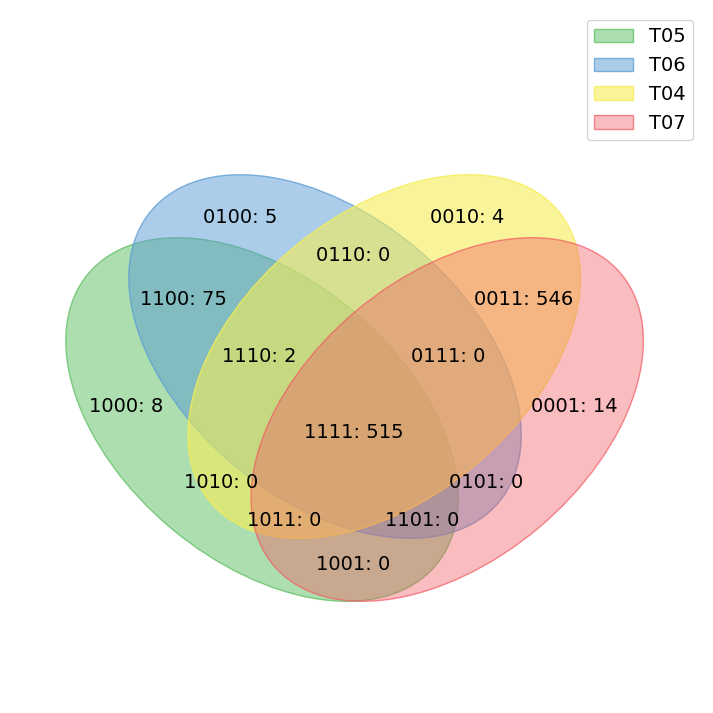

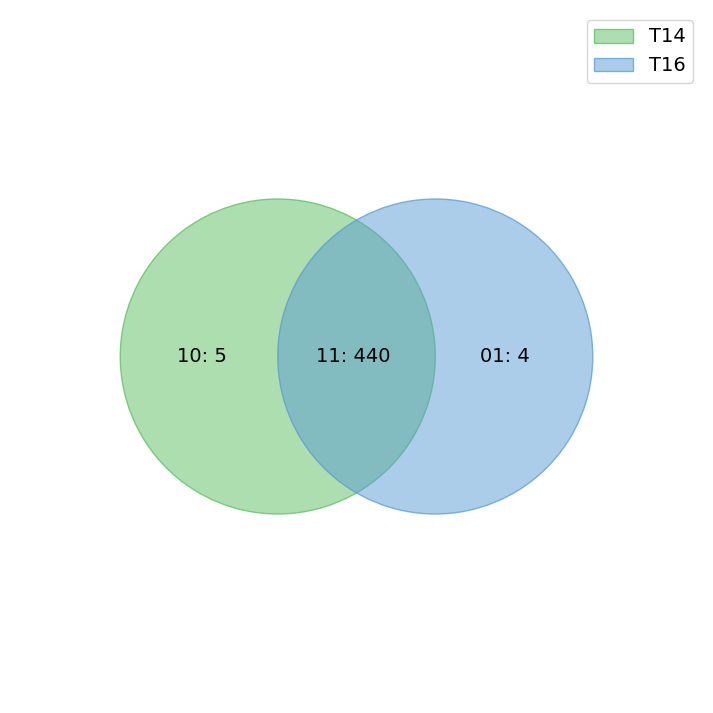

In [10]:
labels = venn.get_labels([T05,T06,T04,T07], fill=['number', 'logic'])
fig, ax = venn.venn4(labels, names=['T05', 'T06', 'T04', 'T07'])
fig.show()
labels = venn.get_labels([T14,T16], fill=['number', 'logic'])
fig, ax = venn.venn2(labels, names=['T14', 'T16'])
fig.show()

#### X_373과 X_374는 같은 값을 가지고 있으므로 하나를 제거해야한다.

In [11]:
print('T050304', len(df[df['LINE']=='T050304']))
tmp = df[df['LINE']=='T050304'][['X_{}'.format(x) for x in T04-T05-T06-T07]]
display(tmp.describe())
if tmp[tmp.columns[tmp.isna().any(axis=0)]].shape[1]:
    display(tmp[tmp.columns[tmp.isna().any(axis=0)]])
print('T010305', len(df[df['LINE']=='T010305']))
tmp = df[df['LINE']=='T010305'][['X_{}'.format(x) for x in T05-T06]]
display(tmp.describe())
if tmp[tmp.columns[tmp.isna().any(axis=0)]].shape[1]:
    display(tmp[tmp.columns[tmp.isna().any(axis=0)]])
print('T010306',len(df[df['LINE']=='T010306']))
tmp = df[df['LINE']=='T010306'][['X_{}'.format(x) for x in T06-T04-T07-T05]]
display(tmp.describe())
if tmp[tmp.columns[tmp.isna().any(axis=0)]].shape[1]:
    display(tmp[tmp.columns[tmp.isna().any(axis=0)]])
print('T050307',len(df[df['LINE']=='T050307']))
tmp = df[df['LINE']=='T050307'][['X_{}'.format(x) for x in T07-T04-T05-T06]]
display(tmp.describe())
if tmp[tmp.columns[tmp.isna().any(axis=0)]].shape[1]:
    display(tmp[tmp.columns[tmp.isna().any(axis=0)]])

print('T010305, T010306',len(df[(df['LINE']=='T010305')|(df['LINE']=='T010306')]))
tmp = df[(df['LINE']=='T010305')|(df['LINE']=='T010306')][['X_{}'.format(x) for x in T05&T06-T04-T07]]
display(tmp.describe())
if tmp[tmp.columns[tmp.isna().any(axis=0)]].shape[1]:
    display(tmp[tmp.columns[tmp.isna().any(axis=0)]])

print('T050304,T050307',len(df[(df['LINE']=='T050304')|(df['LINE']=='T050307')]))
tmp = df[(df['LINE']=='T050304')|(df['LINE']=='T050307')][['X_{}'.format(x) for x in T04&T07-T05-T06]]
display(tmp.describe())
if tmp[tmp.columns[tmp.isna().any(axis=0)]].shape[1]:
    display(tmp[tmp.columns[tmp.isna().any(axis=0)]])

print('T010305, T010306, T050304',len(df[(df['LINE']=='T010305')|(df['LINE']=='T010306')|(df['LINE']=='T050304')]))
tmp = df[(df['LINE']=='T010305')|(df['LINE']=='T010306')|(df['LINE']=='T050304')][['X_{}'.format(x) for x in T05&T06&T04-T07]]
display(tmp.describe())
if tmp[tmp.columns[tmp.isna().any(axis=0)]].shape[1]:
    display(tmp[tmp.columns[tmp.isna().any(axis=0)]])

print('T010305, T010306, T050304',len(df[(df['LINE']=='T010305')|(df['LINE']=='T010306')|(df['LINE']=='T050304')|(df['LINE']=='T050307')]))
tmp = df[(df['LINE']=='T010305')|(df['LINE']=='T010306')|(df['LINE']=='T050304')|(df['LINE']=='T050307')][['X_{}'.format(x) for x in T05&T06&T04&T07]]
display(tmp.describe())
if tmp[tmp.columns[tmp.isna().any(axis=0)]].shape[1]:
    display(tmp[tmp.columns[tmp.isna().any(axis=0)]])


T050304 78


,X_128,X_129,X_2085,X_2069
count,78.000000,78.000000,39.000000,39.000000
mean,14699.833333,14791.923077,0.121096,0.122445
std,8290.625484,8233.160897,0.008983,0.008163
min,837.000000,837.000000,0.110433,0.112960
25%,7827.750000,7830.500000,0.115833,0.116715
50%,13493.500000,13493.500000,0.120529,0.121900
75%,23426.250000,23426.250000,0.122750,0.124950
max,26596.000000,26596.000000,0.158667,0.152985


,X_2085,X_2069
0,0.111783,0.11470
2,0.114000,0.11540
4,0.119340,0.11670
6,0.118140,0.11536
8,0.114000,0.11673
...,...,...
581,NaN,NaN
582,NaN,NaN
583,NaN,NaN
594,NaN,NaN


T010305 59


,X_360,X_361,X_362,X_337,X_338,X_339,X_371,X_372
count,59.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01,59.000000,59.000000
mean,0.249831,0.251356,0.245763,0.000009,0.000018,6.664407e-06,19578.271186,21738.915254
std,0.001302,0.003453,0.004984,0.000001,0.000007,6.784269e-07,10875.204158,10628.805641
min,0.240000,0.250000,0.240000,0.000007,0.000009,5.200000e-06,330.000000,330.000000
25%,0.250000,0.250000,0.240000,0.000008,0.000013,6.150000e-06,10196.500000,14522.000000
50%,0.250000,0.250000,0.250000,0.000009,0.000016,6.700000e-06,21579.000000,24503.000000
75%,0.250000,0.250000,0.250000,0.000010,0.000022,7.100000e-06,28160.000000,29377.000000
max,0.250000,0.260000,0.250000,0.000014,0.000037,8.100000e-06,39542.000000,39542.000000


T010306 70


,X_356,X_357,X_358,X_373,X_341
count,7.000000e+01,7.000000e+01,7.000000e+01,70.000000,70.000000
mean,7.875714e-06,9.170000e-06,6.887143e-06,20910.357143,0.229714
std,6.212273e-07,9.369005e-07,6.652713e-07,12506.636877,0.001678
min,6.900000e-06,8.000000e-06,5.400000e-06,183.000000,0.220000
25%,7.500000e-06,8.500000e-06,6.600000e-06,12182.500000,0.230000
50%,7.800000e-06,8.900000e-06,6.750000e-06,19691.500000,0.230000
75%,8.175000e-06,9.600000e-06,7.100000e-06,33362.750000,0.230000
max,9.800000e-06,1.200000e-05,8.800000e-06,39341.000000,0.230000


T050307 42


,X_2721,X_2722,X_2723,X_130,X_2540,X_2541,X_2542,X_1708,X_1710,X_2545,X_2548,X_2773,X_2774,X_2551
count,42.000000,42.000000,42.00000,42.000000,23.000000,23.000000,23.000000,42.000000,42.000000,23.000000,23.000000,42.000000,42.000000,23.000000
mean,2.004286,1.995526,1.97619,10904.333333,0.207783,0.200621,0.197522,0.251712,1.892787,1.100064,1.004348,0.238095,0.009158,1.141875
std,0.024409,0.024633,0.03036,9234.859281,0.001347,0.000897,0.002274,0.064912,0.466088,0.000307,0.020851,1.543033,0.059347,0.005860
min,1.970000,1.946667,1.93000,806.000000,0.207000,0.199221,0.193000,0.097644,0.746153,1.100000,1.000000,0.000000,0.000000,1.132308
25%,1.977500,1.973462,1.97000,2255.500000,0.207000,0.200015,0.197000,0.211437,1.622780,1.100000,1.000000,0.000000,0.000000,1.136810
50%,2.000000,1.998846,1.97000,8513.500000,0.207000,0.200265,0.197000,0.279345,2.096817,1.100000,1.000000,0.000000,0.000000,1.142647
75%,2.030000,2.008623,2.00000,19865.500000,0.208500,0.201109,0.200000,0.306880,2.258331,1.100000,1.000000,0.000000,0.000000,1.147014
max,2.030000,2.030000,2.03000,26155.000000,0.210000,0.203313,0.200000,0.323948,2.365000,1.101471,1.100000,10.000000,0.384615,1.152381


,X_2540,X_2541,X_2542,X_2545,X_2548,X_2551
1,0.207,0.199812,0.197,1.100000,1.0,1.144928
3,0.207,0.199941,0.197,1.100000,1.0,1.142647
5,0.207,0.200044,0.197,1.100000,1.0,1.147059
7,0.207,0.199221,0.197,1.100000,1.0,1.139706
9,0.207,0.200119,0.197,1.100000,1.0,1.141791
11,0.207,0.200250,0.197,1.100000,1.0,1.135294
13,0.207,0.200265,0.197,1.100000,1.0,1.141176
15,0.207,0.200176,0.197,1.100000,1.0,1.132353
17,0.207,0.199985,0.197,1.100000,1.0,1.138235
19,0.207,0.200206,0.197,1.100000,1.0,1.142647


T010305, T010306 129


,X_256,X_257,X_258,X_261,X_262,X_263,X_265,X_266,X_267,X_268,...,X_367,X_368,X_370,X_246,X_247,X_248,X_250,X_251,X_253,X_254
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,482.758915,489.138760,472.490698,246.856589,247.597674,246.275194,510.186047,521.666667,504.224806,0.195814,...,35.286047,34.687597,557033.976744,1.379845,90.968992,48.124031,11.356589,37.906977,11.573643,46.883721
std,15.444804,16.567039,14.488484,0.284453,0.316836,0.426657,16.913737,16.714203,17.731610,0.004953,...,0.622463,0.621742,41455.623938,0.993682,2.758334,59.153271,0.480859,51.659408,0.496475,4.501090
min,438.300000,443.600000,423.800000,246.000000,246.600000,245.300000,487.000000,500.000000,480.000000,0.190000,...,33.800000,33.200000,498116.000000,1.000000,87.000000,0.000000,11.000000,0.000000,11.000000,42.000000
25%,474.500000,479.300000,466.600000,246.700000,247.400000,245.800000,496.000000,508.000000,489.000000,0.190000,...,34.900000,34.300000,513640.000000,1.000000,89.000000,0.000000,11.000000,0.000000,11.000000,42.000000
50%,484.300000,491.700000,473.400000,246.900000,247.600000,246.400000,508.000000,518.000000,502.000000,0.200000,...,35.200000,34.600000,580542.000000,1.000000,90.000000,5.000000,11.000000,0.000000,12.000000,51.000000
75%,496.500000,504.000000,484.100000,247.000000,247.800000,246.600000,517.000000,527.000000,513.000000,0.200000,...,35.600000,35.100000,594730.000000,2.000000,93.000000,92.000000,12.000000,89.000000,12.000000,51.000000
max,503.800000,512.600000,493.700000,247.600000,248.300000,247.200000,560.000000,580.000000,553.000000,0.200000,...,37.700000,37.100000,619649.000000,11.000000,96.000000,170.000000,12.000000,168.000000,12.000000,51.000000


T050304,T050307 120


,X_2056,X_2057,X_2058,X_2059,X_2060,X_2061,X_2062,X_2063,X_2064,X_2065,...,X_2031,X_2032,X_2033,X_2034,X_2037,X_2038,X_2039,X_2041,X_2042,X_2043
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,62.000000,62.000000,62.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,100.000000,100.000000,100.000000
mean,18.703390,21.389831,34.957627,17.686441,8.008475,16.737288,16.016949,0.197190,0.000010,0.000806,...,0.002390,0.000090,0.000034,0.000017,0.002276,0.000047,0.000020,0.093758,0.095407,0.092047
std,1.526458,1.352642,1.619296,0.813341,0.092057,0.441984,1.037609,0.057666,0.000003,0.000669,...,0.001649,0.000021,0.000006,0.000011,0.001622,0.000016,0.000010,0.001418,0.001725,0.001680
min,16.000000,19.000000,33.000000,17.000000,8.000000,16.000000,15.000000,0.114100,0.000004,0.000199,...,0.000661,0.000060,0.000028,0.000005,0.000584,0.000023,0.000003,0.090990,0.093300,0.090000
25%,18.000000,20.000000,33.000000,17.000000,8.000000,16.000000,15.000000,0.121522,0.000009,0.000247,...,0.001006,0.000064,0.000030,0.000006,0.000930,0.000029,0.000007,0.092310,0.093300,0.090000
50%,18.000000,21.000000,35.000000,17.000000,8.000000,17.000000,16.000000,0.192428,0.000010,0.000402,...,0.001107,0.000100,0.000033,0.000025,0.000990,0.000053,0.000025,0.094150,0.096700,0.093300
75%,20.000000,23.000000,36.000000,18.000000,8.000000,17.000000,17.000000,0.253602,0.000012,0.001559,...,0.004132,0.000105,0.000036,0.000027,0.004020,0.000060,0.000028,0.095000,0.096700,0.093300
max,22.000000,24.000000,38.000000,19.000000,9.000000,17.000000,18.000000,0.311450,0.000018,0.002221,...,0.004960,0.000127,0.000059,0.000031,0.004560,0.000068,0.000030,0.098200,0.100000,0.096700


,X_2056,X_2057,X_2058,X_2059,X_2060,X_2061,X_2062,X_2063,X_2064,X_2065,...,X_2031,X_2032,X_2033,X_2034,X_2037,X_2038,X_2039,X_2041,X_2042,X_2043
0,18.0,21.0,35.0,18.0,8.0,17.0,15.0,0.11960,0.000010,0.000392,...,0.001028,0.000100,0.000037,0.000025,0.000931,0.000055,0.000024,0.09398,0.0967,0.0933
1,21.0,21.0,34.0,17.0,8.0,16.0,17.0,0.31145,0.000010,0.002221,...,0.004094,0.000060,0.000039,0.000006,0.004000,0.000028,0.000006,0.09198,0.0933,0.0900
2,18.0,21.0,35.0,18.0,8.0,17.0,15.0,0.12140,0.000010,0.000412,...,0.000993,0.000105,0.000033,0.000025,0.000918,0.000049,0.000028,0.09364,0.0967,0.0933
3,21.0,20.0,33.0,17.0,8.0,16.0,17.0,0.24910,0.000007,0.001447,...,0.004108,0.000062,0.000033,0.000005,0.003910,0.000026,0.000006,0.09099,0.0933,0.0900
4,18.0,21.0,35.0,18.0,8.0,17.0,15.0,0.11410,0.000010,0.000397,...,0.000981,0.000100,0.000035,0.000027,0.000929,0.000054,0.000029,0.09432,0.0967,0.0933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,18.0,22.0,35.0,19.0,8.0,17.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09330,0.0933,0.0933
583,18.0,22.0,35.0,19.0,8.0,17.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09398,0.0967,0.0933
594,19.0,23.0,36.0,18.0,8.0,17.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09820,0.1000,0.0967


T010305, T010306, T050304 207


,X_1523,X_1407
count,6.000000,6.000000
mean,66.666667,330.000000
std,51.639778,245.197064
min,0.000000,31.000000
25%,25.000000,115.250000
50%,100.000000,391.000000
75%,100.000000,527.250000
max,100.000000,571.000000


,X_1523,X_1407
0,100.0,565.0
2,NaN,NaN
4,NaN,NaN
6,NaN,NaN
8,NaN,NaN
...,...,...
583,NaN,NaN
584,NaN,NaN
585,NaN,NaN
594,0.0,31.0


T010305, T010306, T050304 249


,X_2048,X_2049,X_2050,X_2051,X_284,X_938,X_939,X_940,X_941,X_942,...,X_1673,X_1674,X_1678,X_1679,X_1696,X_1697,X_2044,X_2045,X_2046,X_2047
count,249.000000,249.000000,249.000000,249.000000,249.000000,247.000000,247.000000,247.000000,247.000000,247.000000,...,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,248.000000,248.000000,249.000000,249.000000
mean,1171.140539,1171.268845,930.917254,1065.216496,1.152610,1.320769,1.271915,1.225101,106.524291,106.216913,...,0.111296,0.078745,15.469352,15.027409,36.408907,35.162753,6043.262940,4996.355022,6192.405562,5967.769038
std,956.602352,956.656193,868.426641,736.114440,0.360336,1.422026,1.394779,1.367014,29.363074,29.280855,...,0.013064,0.011879,1.278430,1.211835,1.029050,1.274001,5084.208569,4817.379085,3559.589642,5138.789924
min,12.000000,12.000000,12.000000,12.000000,1.000000,0.310000,0.286129,0.270000,75.000000,74.667742,...,0.090000,0.050000,14.040000,13.670000,34.400000,32.600000,364.000000,0.000000,2212.000000,318.000000
25%,134.000000,134.000000,134.000000,493.000000,1.000000,0.500000,0.500000,0.500000,75.800000,75.540323,...,0.100000,0.070000,14.130000,13.770000,35.300000,33.900000,845.000000,0.000000,2576.000000,719.000000
50%,1289.000000,1290.000000,347.000000,793.000000,1.000000,0.560000,0.549687,0.540000,134.300000,134.080645,...,0.120000,0.080000,16.540000,16.050000,36.600000,35.200000,10337.500000,9037.500000,9030.000000,10330.000000
75%,1689.000000,1690.000000,1644.000000,1643.000000,1.000000,0.820000,0.703065,0.625000,134.600000,134.167742,...,0.120000,0.090000,16.670000,16.170000,37.300000,36.200000,10919.716665,9619.250000,9618.000000,10918.000000
max,2653.000000,2653.000000,2653.000000,2514.000000,2.000000,5.000000,4.904194,4.810000,134.800000,134.287097,...,0.140000,0.090000,16.930000,16.390000,38.600000,38.500000,11878.000000,10579.000000,10578.000000,11877.000000


,X_938,X_939,X_940,X_941,X_942,X_943,X_944,X_945,X_946,X_947,...,X_1671,X_1672,X_1673,X_1674,X_1678,X_1679,X_1696,X_1697,X_2044,X_2045
0,4.00,3.930968,3.88,75.4,75.254839,75.1,20.5,20.306452,20.1,61.0,...,29.6,29.6,0.09,0.06,14.13,13.77,35.1,35.0,364.0,0.0
1,4.00,3.921875,3.87,75.5,75.278125,75.0,20.5,20.300000,20.2,61.0,...,29.6,29.6,0.09,0.06,14.13,13.77,35.1,35.0,364.0,0.0
2,4.03,3.896774,3.78,75.5,75.170968,75.0,21.0,20.461290,20.0,61.0,...,29.6,29.6,0.10,0.07,14.13,13.77,35.6,35.0,364.0,0.0
3,3.93,3.856562,3.74,75.3,75.125000,74.9,20.7,20.537500,20.4,61.0,...,29.6,29.6,0.10,0.06,14.13,13.77,35.1,35.0,364.0,0.0
4,4.32,4.250968,4.17,75.5,75.258065,75.1,20.6,20.406452,20.2,50.0,...,29.6,29.6,0.09,0.06,14.13,13.77,34.7,34.5,364.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1210.0,0.0
584,0.57,0.566875,0.55,134.5,134.225000,134.0,24.5,24.103125,23.8,121.3,...,26.4,26.2,0.12,0.09,16.63,16.19,37.1,36.6,11878.0,10579.0
585,0.57,0.567742,0.56,134.7,134.222581,133.8,24.3,24.022581,23.7,130.0,...,26.2,26.2,0.13,0.09,16.74,16.17,37.7,36.2,11878.0,10579.0
594,4.10,4.035806,3.97,75.3,75.164516,75.0,23.3,23.200000,23.1,61.0,...,28.8,28.8,0.10,0.06,14.13,13.76,37.7,36.2,1255.0,0.0


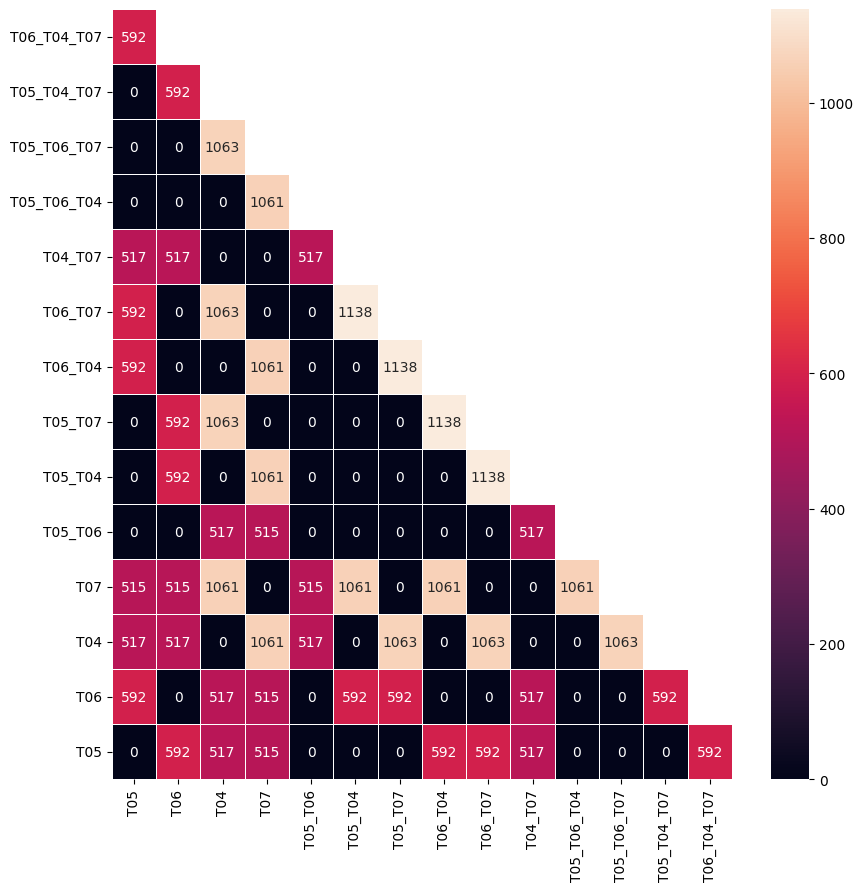

In [12]:
a_unis = {
    "T05":T05,
    "T06":T06,
    "T04":T04,
    "T07":T07
}

a_uni_keys = a_unis.keys()
columns = []
for i in range(len(a_unis)-1):
    for sample in list(combinations(a_uni_keys, i+1)):
        columns.append(('_').join(sample))
res = pd.DataFrame(columns=columns)

for col in columns:
    target = [x for x in a_uni_keys if x not in col.split('_')]
    for i in range(len(a_unis)-1):
        for sample in list(combinations(target, i+1)):
            comp = set()
            for s in sample:
                comp = comp|set(a_unis[s])
            comp = comp
            tmp = set()
            for c in col.split('_'):
                tmp = tmp|set(a_unis[c])
            tmp = tmp
            res.loc[col,('_').join(sample)]=len(tmp&comp)

mask = np.triu(np.ones_like(res, dtype=np.bool_))
mask = mask&(~np.array(np.eye(N=mask.shape[0]), dtype=np.bool_))
fig, ax = plt.subplots(figsize=(10,10))
res = res.fillna(0).astype(int)
ax = sns.heatmap(res.reindex(index=res.index[::-1]), mask=mask, annot=True, fmt='d', linewidths=0.5)
plt.show()